In [20]:
import numpy as np
import pandas as pd

In [21]:
data_train = pd.read_csv("./data/Train.csv")
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [24]:
surived_df = data_train.loc[data_train['Survived'] == 1]
surived_df.describe()

PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   342.000000     342.0  342.000000  290.000000  342.000000  342.000000   
mean    444.368421       1.0    1.950292   28.343690    0.473684    0.464912   
std     252.358840       0.0    0.863321   14.950952    0.708688    0.771712   
min       2.000000       1.0    1.000000    0.420000    0.000000    0.000000   
25%     250.750000       1.0    1.000000   19.000000    0.000000    0.000000   
50%     439.500000       1.0    2.000000   28.000000    0.000000    0.000000   
75%     651.500000       1.0    3.000000   36.000000    1.000000    1.000000   
max     890.000000       1.0    3.000000   80.000000    4.000000    5.000000   

             Fare  
count  342.000000  
mean    48.395408  
std     66.596998  
min      0.000000  
25%     12.475000  
50%     26.000000  
75%     57.000000  
max    512.329200

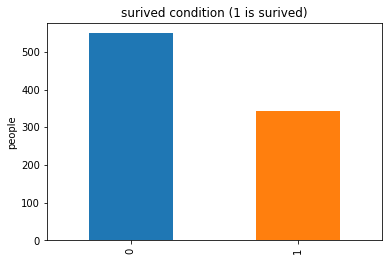

In [25]:
import matplotlib.pyplot as plt
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"surived condition (1 is surived)")
plt.ylabel(u"people")
plt.show()

<Figure size 432x288 with 0 Axes>

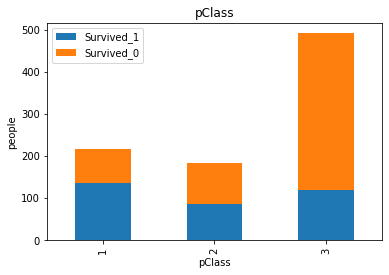

In [26]:
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'Survived_1':Survived_1, 'Survived_0':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("pClass")
plt.xlabel("pClass") 
plt.ylabel("people") 

plt.show()

<Figure size 432x288 with 0 Axes>

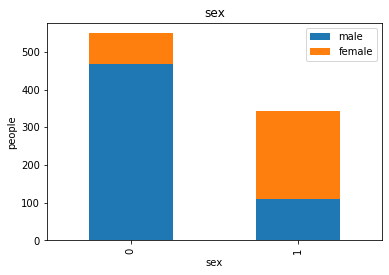

In [27]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({'male':Survived_m, 'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title("sex")
plt.xlabel("sex") 
plt.ylabel("people")
plt.show()

<Figure size 432x288 with 0 Axes>

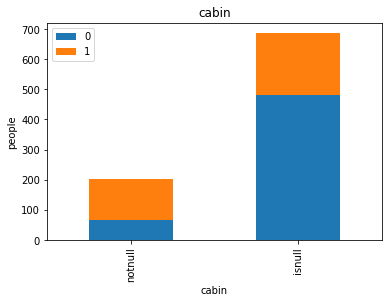

In [28]:
fig = plt.figure()

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'notnull':Survived_cabin, 'isnull':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title("cabin")
plt.xlabel("cabin") 
plt.ylabel("people")
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor
 
def set_missing_ages(df):
    
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    y = known_age[:, 0]
    X = known_age[:, 1:]

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

/Users/alexolala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/alexolala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
5                                     Moran, Mr. James    male  23.838953   
6                              McCarthy, Mr. Timothy J    male  54.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
13                         Andersson, Mr. Anders Johan    male  39.000000   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                                Rice, Master. Eugene    male   2.000000   
17                        Williams, Mr. Charles Eugene    male  32.066493   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                             Masselmani, Mrs. Fatima  female  29.518205   
20                             

In [30]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

PassengerId  Survived        Age  SibSp  Parch      Fare  Cabin_No  \
0              1         0  22.000000      1      0    7.2500         1   
1              2         1  38.000000      1      0   71.2833         0   
2              3         1  26.000000      0      0    7.9250         1   
3              4         1  35.000000      1      0   53.1000         0   
4              5         0  35.000000      0      0    8.0500         1   
5              6         0  23.838953      0      0    8.4583         1   
6              7         0  54.000000      0      0   51.8625         0   
7              8         0   2.000000      3      1   21.0750         1   
8              9         1  27.000000      0      2   11.1333         1   
9             10         1  14.000000      1      0   30.0708         1   
10            11         1   4.000000      1      1   16.7000         0   
11            12         1  58.000000      0      0   26.5500         0   
12            13         0  20.000000      0      0    8.0500         1   
13            14         0  39.000000      1      5   31.2750         1   
14            15         0  14.000000      0      0    7.8542         1   
15            16         1  55.000000      0      0   16.0000         1   
16            17         0   2.000000      4      1   29.1250         1   
17            18         1  32.066493      0      0   13.0000         1   
18            19         0  31.000000      1      0   18.0000         1   
19            20         1  29.518205      0      0    7.2250         1   
20            21         0  35.000000      0      0   26.0000         1   
21            22         1  34.000000      0      0   13.0000         0   
22            23         1  15.000000      0      0    8.0292         1   
23            24         1  28.000000      0      0   35.5000         0   
24            25         0   8.000000      3      1   21.0750         1   
25            26         1  38.000000      1      5   31.3875         1   
26            27         0  29.518205      0      0    7.2250         1   
27            28         0  19.000000      3      2  263.0000         0   
28            29         1  22.380113      0      0    7.8792         1   
29            30         0  27.947206      0      0    7.8958         1   
..           ...       ...        ...    ...    ...       ...       ...   
861          862         0  21.000000      1      0   11.5000         1   
862          863         1  48.000000      0      0   25.9292         0   
863          864         0  10.869867      8      2   69.5500         1   
864          865         0  24.000000      0      0   13.0000         1   
865          866         1  42.000000      0      0   13.0000         1   
866          867         1  27.000000      1      0   13.8583         1   
867          868         0  31.000000      0      0   50.4958         0   
868          869         0  25.977889      0      0    9.5000         1   
869          870         1   4.000000      1      1   11.1333         1   
870          871         0  26.000000      0      0    7.8958         1   
871          872         1  47.000000      1      1   52.5542         0   
872          873         0  33.000000      0      0    5.0000         0   
873          874         0  47.000000      0      0    9.0000         1   
874          875         1  28.000000      1      0   24.0000         1   
875          876         1  15.000000      0      0    7.2250         1   
876          877         0  20.000000      0      0    9.8458         1   
877          878         0  19.000000      0      0    7.8958         1   
878          879         0  27.947206      0      0    7.8958         1   
879          880         1  56.000000      0      1   83.1583         0   
880          881         1  25.000000      0      1   26.0000         1   
881          882         0  33.000000      0      0    7.8958         1   
882          883         0  22

In [31]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit([df['Age']])
# scaler.fit_transform([df['Age']], age_scale_param)
df['Age_scaled'] = scaler.fit_transform([df['Age']], age_scale_param)[0]
fare_scale_param = scaler.fit([df['Fare']])
df['Fare_scaled'] = scaler.fit_transform([df['Fare']], fare_scale_param)[0]
df

PassengerId  Survived        Age  SibSp  Parch      Fare  Cabin_No  \
0              1         0  22.000000      1      0    7.2500         1   
1              2         1  38.000000      1      0   71.2833         0   
2              3         1  26.000000      0      0    7.9250         1   
3              4         1  35.000000      1      0   53.1000         0   
4              5         0  35.000000      0      0    8.0500         1   
5              6         0  23.838953      0      0    8.4583         1   
6              7         0  54.000000      0      0   51.8625         0   
7              8         0   2.000000      3      1   21.0750         1   
8              9         1  27.000000      0      2   11.1333         1   
9             10         1  14.000000      1      0   30.0708         1   
10            11         1   4.000000      1      1   16.7000         0   
11            12         1  58.000000      0      0   26.5500         0   
12            13         0  20.000000      0      0    8.0500         1   
13            14         0  39.000000      1      5   31.2750         1   
14            15         0  14.000000      0      0    7.8542         1   
15            16         1  55.000000      0      0   16.0000         1   
16            17         0   2.000000      4      1   29.1250         1   
17            18         1  32.066493      0      0   13.0000         1   
18            19         0  31.000000      1      0   18.0000         1   
19            20         1  29.518205      0      0    7.2250         1   
20            21         0  35.000000      0      0   26.0000         1   
21            22         1  34.000000      0      0   13.0000         0   
22            23         1  15.000000      0      0    8.0292         1   
23            24         1  28.000000      0      0   35.5000         0   
24            25         0   8.000000      3      1   21.0750         1   
25            26         1  38.000000      1      5   31.3875         1   
26            27         0  29.518205      0      0    7.2250         1   
27            28         0  19.000000      3      2  263.0000         0   
28            29         1  22.380113      0      0    7.8792         1   
29            30         0  27.947206      0      0    7.8958         1   
..           ...       ...        ...    ...    ...       ...       ...   
861          862         0  21.000000      1      0   11.5000         1   
862          863         1  48.000000      0      0   25.9292         0   
863          864         0  10.869867      8      2   69.5500         1   
864          865         0  24.000000      0      0   13.0000         1   
865          866         1  42.000000      0      0   13.0000         1   
866          867         1  27.000000      1      0   13.8583         1   
867          868         0  31.000000      0      0   50.4958         0   
868          869         0  25.977889      0      0    9.5000         1   
869          870         1   4.000000      1      1   11.1333         1   
870          871         0  26.000000      0      0    7.8958         1   
871          872         1  47.000000      1      1   52.5542         0   
872          873         0  33.000000      0      0    5.0000         0   
873          874         0  47.000000      0      0    9.0000         1   
874          875         1  28.000000      1      0   24.0000         1   
875          876         1  15.000000      0      0    7.2250         1   
876          877         0  20.000000      0      0    9.8458         1   
877          878         0  19.000000      0      0    7.8958         1   
878          879         0  27.947206      0      0    7.8958         1   
879          880         1  56.000000      0      1   83.1583         0   
880          881         1  25.000000      0      1   26.0000         1   
881          882         0  33.000000      0      0    7.8958         1   
882          883         0  22

In [32]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

/Users/alexolala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=1e-06, verbose=0,
                   warm_start=False)

In [33]:
X.shape

(891, 14)

In [34]:
data_test = pd.read_csv("./data/test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform([df_test['Age']], age_scale_param)[0]
df_test['Fare_scaled'] = scaler.fit_transform([df_test['Fare']], fare_scale_param)[0]
df_test

/Users/alexolala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


PassengerId        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  \
0            892  34.500000      0      0    7.8292         1          0   
1            893  47.000000      1      0    7.0000         1          0   
2            894  62.000000      0      0    9.6875         1          0   
3            895  27.000000      0      0    8.6625         1          0   
4            896  22.000000      1      1   12.2875         1          0   
5            897  14.000000      0      0    9.2250         1          0   
6            898  30.000000      0      0    7.6292         1          0   
7            899  26.000000      1      1   29.0000         1          0   
8            900  18.000000      0      0    7.2292         1          0   
9            901  21.000000      2      0   24.1500         1          0   
10           902  27.947206      0      0    7.8958         1          0   
11           903  46.000000      0      0   26.0000         1          0   
12           904  23.000000      1      0   82.2667         0          1   
13           905  63.000000      1      0   26.0000         1          0   
14           906  47.000000      1      0   61.1750         0          1   
15           907  24.000000      1      0   27.7208         1          0   
16           908  35.000000      0      0   12.3500         1          0   
17           909  21.000000      0      0    7.2250         1          0   
18           910  27.000000      1      0    7.9250         1          0   
19           911  45.000000      0      0    7.2250         1          0   
20           912  55.000000      1      0   59.4000         1          0   
21           913   9.000000      0      1    3.1708         1          0   
22           914  52.314311      0      0   31.6833         1          0   
23           915  21.000000      0      1   61.3792         1          0   
24           916  48.000000      1      3  262.3750         0          1   
25           917  50.000000      1      0   14.5000         1          0   
26           918  22.000000      0      1   61.9792         0          1   
27           919  22.500000      0      0    7.2250         1          0   
28           920  41.000000      0      0   30.5000         0          1   
29           921  23.459683      2      0   21.6792         1          0   
..           ...        ...    ...    ...       ...       ...        ...   
388         1280  21.000000      0      0    7.7500         1          0   
389         1281   6.000000      3      1   21.0750         1          0   
390         1282  23.000000      0      0   93.5000         0          1   
391         1283  51.000000      0      1   39.4000         0          1   
392         1284  13.000000      0      2   20.2500         1          0   
393         1285  47.000000      0      0   10.5000         1          0   
394         1286  29.000000      3      1   22.0250         1          0   
395         1287  18.000000      1      0   60.0000         0          1   
396         1288  24.000000      0      0    7.2500         1          0   
397         1289  48.000000      1      1   79.2000         0          1   
398         1290  22.000000      0      0    7.7750         1          0   
399         1291  31.000000      0      0    7.7333         1          0   
400         1292  30.000000      0      0  164.8667         0          1   
401         1293  38.000000      1      0   21.0000         1          0   
402         1294  22.000000      0      1   59.4000         1          0   
403         1295  17.000000      0      0   47.1000         1          0   
404         1296  43.000000      1      0   27.7208         0          1   
405         1297  20.000000      0      0   13.8625         0          1   
406         1298  23.000000      1      0   10.5000         1          0   
407         1299  50.000000      1      1  211.5000         0          1   
408         1300  19.895581      0      0    7.7208  

In [35]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("./data/logistic_regression_predictions.csv", index=False)

/Users/alexolala/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
pd.read_csv("./data/logistic_regression_predictions.csv") # 0.76

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         1
405         1297         1
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [45]:
pd.read_csv("./data/test.csv")

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

In [49]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

columns                     coef
0         SibSp    [-0.2005793693344207]
1         Parch  [-0.056174776651615445]
2      Cabin_No   [-0.22088345399638543]
3     Cabin_Yes     [0.7236278309658405]
4    Embarked_C    [0.20044658891174824]
5    Embarked_Q                    [0.0]
6    Embarked_S   [-0.34186021009603185]
7    Sex_female     [1.9939503158387057]
8      Sex_male     [-0.668590093167164]
9      Pclass_1                    [0.0]
10     Pclass_2                    [0.0]
11     Pclass_3    [-1.0257163959983286]
12   Age_scaled                    [0.0]
13  Fare_scaled                    [0.0]

In [50]:
from sklearn.model_selection import cross_val_score, train_test_split

clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]
print(cross_val_score(clf, X, y, cv=5))

[0.79888268 0.79888268 0.80337079 0.78089888 0.81920904]


In [53]:
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("./data/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

PassengerId  Survived  Pclass  \
23            24         1       1   
25            26         1       3   
49            50         0       3   
54            55         0       1   
55            56         1       1   
65            66         1       3   
78            79         1       2   
81            82         1       3   
96            97         0       1   
118          119         0       1   

                                                  Name     Sex    Age  SibSp  \
23                        Sloper, Mr. William Thompson    male  28.00      0   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.00      1   
49       Arnold-Franchi, Mrs. Josef (Josefine Franchi)  female  18.00      1   
54                      Ostby, Mr. Engelhart Cornelius    male  65.00      0   
55                                   Woolner, Mr. Hugh    male    NaN      0   
65                            Moubarek, Master. Gerios    male    NaN      1   
78                       Caldwell, Master. Alden Gates    male   0.83      0   
81                         Sheerlinck, Mr. Jan Baptist    male  29.00      0   
96                           Goldschmidt, Mr. George B    male  71.00      0   
118                           Baxter, Mr. Quigg Edmond    male  24.00      0   

     Parch    Ticket      Fare    Cabin Embarked  
23       0    113788   35.5000       A6        S  
25       5    347077   31.3875      NaN        S  
49       0    349237   17.8000      NaN        S  
54       1    113509   61.9792      B30        C  
55       0     19947   35.5000      C52        S  
65       1      2661   15.2458      NaN        C  
78       2    248738   29.0000      NaN        S  
81       0    345779    9.5000      NaN        S  
96       0  PC 17754   34.6542       A5        C  
118      1  PC 17558  247.5208  B58 B60        C

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y)

ValueError: Found input variables with inconsistent numbers of samples: [86, 891]